Recording...
Saving audio to audiofiles/output.wav
Audio saved successfully!


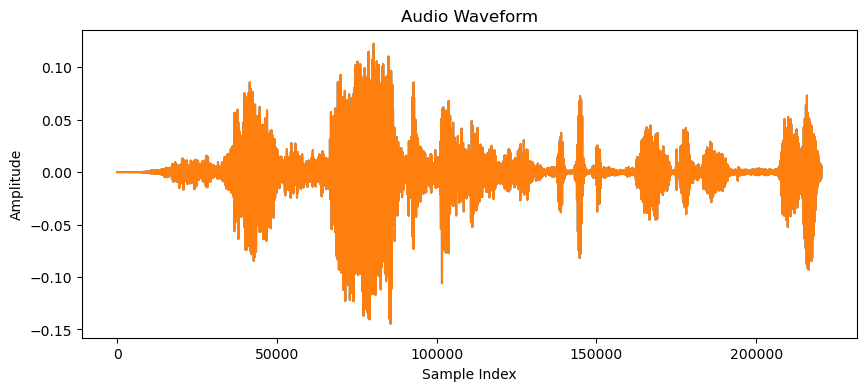

c:\Users\Nifdi Guliyev\anaconda3\lib\site-packages\torchaudio\functional\functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


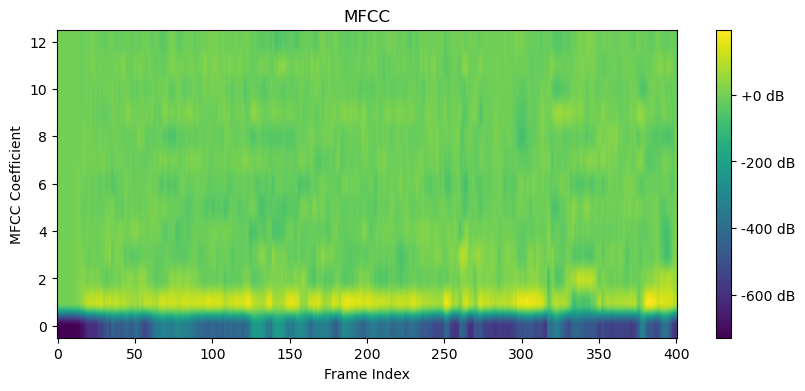

Number of Channels: 2
Number of Frames: 80000
Duration (seconds): 5.00


In [5]:
import torchaudio
import torch
import matplotlib.pyplot as plt
import sounddevice as sd
import scipy.io.wavfile as wav

# Define the parameters for audio recording
duration = 5  # Duration in seconds
sample_rate = 44100  # Sampling rate (samples per second)
filename = "audiofiles/output.wav"  # Name of the output WAV file

# Record audio
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2)
sd.wait()

# Save the audio data as a WAV file
print("Saving audio to", filename)
wav.write(filename, sample_rate, audio_data)

print("Audio saved successfully!")



# Load an audio file
waveform, sample_rate = torchaudio.load(filename)

# Display the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.title("Audio Waveform")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

# Resample (if needed)
target_sample_rate = 16000  # Example target sample rate
if sample_rate != target_sample_rate:
    resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sample_rate)
    waveform = resampler(waveform)

# Calculate MFCCs
n_mfcc = 13  # Number of MFCC coefficients
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=target_sample_rate,
    n_mfcc=n_mfcc,
)

mfcc = mfcc_transform(waveform)

# Display MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(mfcc[0].detach().numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.title("MFCC")
plt.xlabel("Frame Index")
plt.ylabel("MFCC Coefficient")
plt.colorbar(format="%+2.0f dB")
plt.show()

# Get other information
num_channels = waveform.shape[0]
num_frames = waveform.shape[1]
duration = num_frames / target_sample_rate

print(f"Number of Channels: {num_channels}")
print(f"Number of Frames: {num_frames}")
print(f"Duration (seconds): {duration:.2f}")

# You can further preprocess and use these features for machine learning tasks.

In [4]:
!streamlit run app.py

^C


In [5]:
str(torchaudio.get_audio_backend())

'None'